In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp
from datetime import datetime
%matplotlib inline
#%matplotlib nbagg
#%load_ext heat
#%lprun

In [27]:
#d = pd.read_csv("Hamish2.txt",delimiter='\t',header=None)
d = pd.read_csv("unpacked.txt",delimiter='\t',header=None)
channel = np.array(d[0])
edge = np.array(d[1])
time = np.array(d[2])

In [28]:
channel1_rising = time[np.where(np.logical_and(channel==1,edge==0))]
len(channel1_rising)

2399223

In [29]:
def clearTimeDiff():
    try:
        del threshold
    except:
        pass
    try:
        del one_s_bins
    except:
        pass
    try:
        del lowTime
    except:
        pass
    try:
        del highTime
    except:
        pass
    try:
        del lowTimeRanges
    except:
        pass
    try:
        del highTimeRanges
    except:
        pass
    try:
        del i
    except:
        pass
    try:
        del xtic
    except:
        pass
    try:
        del tempTime
    except:
        pass
    try:
        del endTime
    except:
        pass
    try:
        del bns
    except:
        pass
    try:
        del highDiffs
    except:
        pass
    try:
        del lowDiffs
    except:
        pass
    try:
        del allDiffs
    except:
        pass
    print("Cleared variables from memory\n")

# Low Threshold

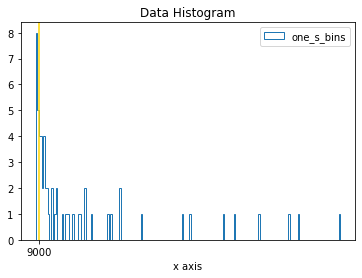

In [31]:
pp.close()
threshold = 9e3
one_s_bins, *trash = np.histogram(time[np.where(np.logical_and(channel==1,edge==0))],bins=60)

pp.hist(one_s_bins,bins=200,label = "one_s_bins",histtype = 'step')
pp.legend()
pp.xlabel("x axis")
pp.xticks([threshold])
pp.axvline(x=threshold, ymin=0, ymax=6, color = "gold")
pp.title("Data Histogram")
pp.show()

In [32]:
pp.close()
xtic=[0]
lowTimeRanges = []
highTimeRanges = []
i = 0
lowTime = []
highTime = []
while i < len(one_s_bins):
    print(i)
    print()
    if one_s_bins[i] < threshold:
        startSecond = i
        while one_s_bins[i] < threshold:
            if i+1 == len(one_s_bins):
                i += 1
                break
            else:
                lowTime.append(i)
                i += 1
        endSecond = i
        lowTimeRanges.append(np.array([startSecond,endSecond]))
        xtic.append(endSecond)
    else:
        startSecond = i
        while one_s_bins[i] >= threshold:
            if i+1 == len(one_s_bins):
                i += 1
                break
            else:
                highTime.append(i)
                i += 1
        endSecond = i
        highTimeRanges.append(np.array([startSecond,endSecond]))
        xtic.append(endSecond)

#lowTime = np.array(lowTime)
#highTime = np.array(highTime)
lowTimeRanges = np.array(lowTimeRanges)
highTimeRanges = np.array(highTimeRanges)

0

7

11

29

33

43

48



In [33]:
print(highTimeRanges)
print()
print(lowTimeRanges)

[[ 0  7]
 [11 29]
 [33 43]
 [48 60]]

[[ 7 11]
 [29 33]
 [43 48]]


In [34]:
print(highTime)
print()
print(lowTime)

[0, 1, 2, 3, 4, 5, 6, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58]

[7, 8, 9, 10, 29, 30, 31, 32, 43, 44, 45, 46, 47]


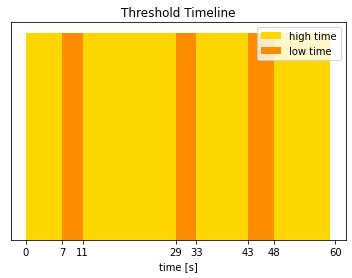

In [35]:
tempTime = highTime + lowTime
endTime = 1 + max(tempTime)

bns = []
i = 0
while i <= endTime:
    bns.append(i)
    i += 1
    
pp.hist(highTime,bins=bns,label="high time", histtype = 'bar', color = "gold")
pp.hist(lowTime,bins=bns,label="low time", histtype = 'bar', color = "darkorange")
pp.legend()
pp.xlabel("time [s]")
pp.yticks([])
pp.xticks(xtic)
pp.title("Threshold Timeline")
pp.show()

In [36]:
pp.close()

def getDiffs(timePairs):
    diffList = []
    for pair in timePairs:
        timeValues = channel1_rising[np.logical_and(channel1_rising > (pair[0]*1e9), channel1_rising < (pair[1]*1e9))]
        theseDiffs = list(timeValues[1:]-timeValues[:-1])
        diffList = diffList + theseDiffs
    return np.array(diffList)
#del lowDiffs
#del highDiffs
lowDiffs = getDiffs([[7,11],[29,33],[43,47]])
highDiffs = getDiffs(highTimeRanges) #highTimeRanges
allDiffs = np.array(list(lowDiffs) + list(highDiffs))

In [37]:
len(lowDiffs)

92460

In [38]:
len(highDiffs)

2109502

In [39]:
len(allDiffs)

2201962

<ipython-input-40-3214a8b073cb>:3: RuntimeWarning: invalid value encountered in log10
  ax.hist(np.log10(allDiffs), bins = bns, histtype = 'step', density = True, label = 'All times')
c:\users\hamis\appdata\local\programs\python\python38-32\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\hamis\appdata\local\programs\python\python38-32\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
<ipython-input-40-3214a8b073cb>:4: RuntimeWarning: invalid value encountered in log10
  ax.hist(np.log10(highDiffs), bins = bns, histtype = 'step', density = True, label = 'High rate')
c:\users\hamis\appdata\local\programs\python\python38-32\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\hamis\appdata\local\programs\python\python3

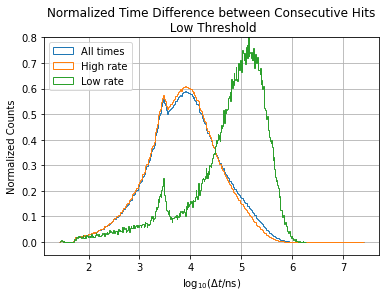

In [40]:
bns = 400
ax = pp.subplot(1,1,1)
ax.hist(np.log10(allDiffs), bins = bns, histtype = 'step', density = True, label = 'All times')
ax.hist(np.log10(highDiffs), bins = bns, histtype = 'step', density = True, label = 'High rate')
ax.hist(np.log10(lowDiffs), bins = bns, histtype = 'step', density = True, label = 'Low rate')
ax.grid()
ax.set_axisbelow(True)
#ax.set_xlim(1,6.1)
ax.set_ylim(-0.05,0.8)
ax.legend(loc = 'upper left')
ax.set_ylabel("Normalized Counts")
ax.set_xlabel(r"$\mathrm{log}_{10} \left(\Delta t/\mathrm{ns}\right)$")
ax.set_title("Normalized Time Difference between Consecutive Hits\n Low Threshold")
pp.show()

In [41]:
clearTimeDiff()

Cleared variables from memory



# Second Threshold

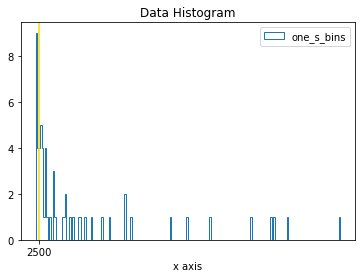

In [43]:
pp.close()
threshold = 2.5e3
one_s_bins, *trash = np.histogram(time[np.where(np.logical_and(channel==2,edge==0))],bins=60)

pp.hist(one_s_bins,bins=200,label = "one_s_bins",histtype = 'step')
pp.legend()
pp.xlabel("x axis")
pp.xticks([threshold])
pp.axvline(x=threshold, ymin=0, ymax=6, color = "gold")
pp.title("Data Histogram")
pp.show()

In [44]:
pp.close()

In [45]:
xtic=[0]
lowTimeRanges = []
highTimeRanges = []
i = 0
lowTime = []
highTime = []
while i < len(one_s_bins):
    print(i)
    print()
    if one_s_bins[i] < threshold:
        startSecond = i
        while one_s_bins[i] < threshold:
            if i+1 == len(one_s_bins):
                i += 1
                break
            else:
                lowTime.append(i)
                i += 1
        endSecond = i
        lowTimeRanges.append(np.array([startSecond,endSecond]))
        xtic.append(endSecond)
    else:
        startSecond = i
        while one_s_bins[i] >= threshold:
            if i+1 == len(one_s_bins):
                i += 1
                break
            else:
                highTime.append(i)
                i += 1
        endSecond = i
        highTimeRanges.append(np.array([startSecond,endSecond]))
        xtic.append(endSecond)
        
#lowTime = np.array(lowTime)
#highTime = np.array(highTime)
lowTimeRanges = np.array(lowTimeRanges)
highTimeRanges = np.array(highTimeRanges)

0

7

11

29

33

43

48



In [46]:
print(highTime)
print()
print(lowTime)

[0, 1, 2, 3, 4, 5, 6, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58]

[7, 8, 9, 10, 29, 30, 31, 32, 43, 44, 45, 46, 47]


In [47]:
print(highTimeRanges)
print()
print(lowTimeRanges)

[[ 0  7]
 [11 29]
 [33 43]
 [48 60]]

[[ 7 11]
 [29 33]
 [43 48]]


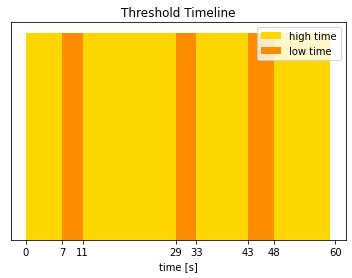

In [48]:
tempTime = highTime + lowTime
endTime = 1 + max(tempTime)

bns = []
i = 0
while i <= endTime:
    bns.append(i)
    i += 1
    
pp.hist(highTime,bins=bns,label="high time", histtype = 'bar', color = "gold")
pp.hist(lowTime,bins=bns,label="low time", histtype = 'bar', color = "darkorange")
pp.legend()
pp.xlabel("time [s]")
pp.yticks([])
pp.xticks(xtic)
pp.title("Threshold Timeline")
pp.show()

In [49]:
pp.close()

def getDiffs(timePairs):
    diffList = []
    for pair in timePairs:
        timeValues = channel1_rising[np.logical_and(channel1_rising > (pair[0]*1e9), channel1_rising < (pair[1]*1e9))]
        theseDiffs = list(timeValues[1:]-timeValues[:-1])
        diffList = diffList + theseDiffs
    return np.array(diffList)

lowDiffs = getDiffs(lowTimeRanges) #lowTimeRanges
highDiffs = getDiffs(highTimeRanges)
allDiffs = np.array(list(lowDiffs) + list(highDiffs))

In [50]:
print(len(lowDiffs))
print()
print(len(highDiffs))

289714

2109502


<ipython-input-51-15a1aa877787>:3: RuntimeWarning: invalid value encountered in log10
  ax.hist(np.log10(allDiffs), bins = bns, histtype = 'step', density = True, label = 'All times')
c:\users\hamis\appdata\local\programs\python\python38-32\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\hamis\appdata\local\programs\python\python38-32\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
<ipython-input-51-15a1aa877787>:4: RuntimeWarning: invalid value encountered in log10
  ax.hist(np.log10(highDiffs), bins = bns, histtype = 'step', density = True, label = 'High rate')
c:\users\hamis\appdata\local\programs\python\python38-32\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\hamis\appdata\local\programs\python\python3

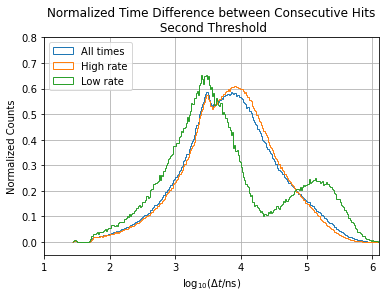

In [51]:
bns = 400
ax = pp.subplot(1,1,1)
ax.hist(np.log10(allDiffs), bins = bns, histtype = 'step', density = True, label = 'All times')
ax.hist(np.log10(highDiffs), bins = bns, histtype = 'step', density = True, label = 'High rate')
ax.hist(np.log10(lowDiffs), bins = bns, histtype = 'step', density = True, label = 'Low rate')
ax.grid()
ax.set_axisbelow(True)
ax.set_xlim(1,6.1)
ax.set_ylim(-0.05,0.8)
ax.legend(loc = 'upper left')
ax.set_ylabel("Normalized Counts")
ax.set_xlabel(r"$\mathrm{log}_{10} \left(\Delta t/\mathrm{ns}\right)$")
ax.set_title("Normalized Time Difference between Consecutive Hits\n Second Threshold")
pp.show()

In [52]:
clearTimeDiff()

Cleared variables from memory



# Third Threshold

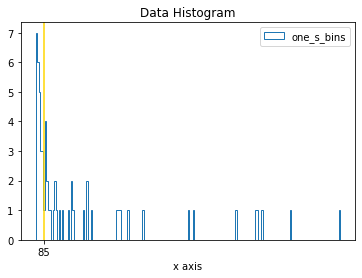

In [53]:
pp.close()
threshold = 85
one_s_bins, *trash = np.histogram(time[np.where(np.logical_and(channel==3,edge==0))],bins=60)

pp.hist(one_s_bins,bins=200,label = "one_s_bins",histtype = 'step')
pp.legend()
pp.xlabel("x axis")
pp.xticks([threshold])
pp.axvline(x=threshold, ymin=0, ymax=6, color = "gold")
pp.title("Data Histogram")
pp.show()

In [54]:
pp.close()
xtic=[0]
lowTimeRanges = []
highTimeRanges = []
i = 0
lowTime = []
highTime = []
while i < len(one_s_bins):
    print(i)
    print()
    if one_s_bins[i] < threshold:
        startSecond = i
        while one_s_bins[i] < threshold:
            if i+1 == len(one_s_bins):
                i += 1
                break
            else:
                lowTime.append(i)
                i += 1
        endSecond = i
        lowTimeRanges.append(np.array([startSecond,endSecond]))
        xtic.append(endSecond)
    else:
        startSecond = i
        while one_s_bins[i] >= threshold:
            if i+1 == len(one_s_bins):
                i += 1
                break
            else:
                highTime.append(i)
                i += 1
        endSecond = i
        highTimeRanges.append(np.array([startSecond,endSecond]))
        xtic.append(endSecond)
        
#lowTime = np.array(lowTime)
#highTime = np.array(highTime)
lowTimeRanges = np.array(lowTimeRanges)
highTimeRanges = np.array(highTimeRanges)

0

6

11

14

15

16

17

26

34

41

48

58



In [55]:
print(highTime)
print()
print(lowTime)

[0, 1, 2, 3, 4, 5, 11, 12, 13, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 34, 35, 36, 37, 38, 39, 40, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57]

[6, 7, 8, 9, 10, 14, 16, 26, 27, 28, 29, 30, 31, 32, 33, 41, 42, 43, 44, 45, 46, 47, 58]


In [56]:
print(highTimeRanges) #clearTimeDiff()
print()
print(lowTimeRanges)

[[ 0  6]
 [11 14]
 [15 16]
 [17 26]
 [34 41]
 [48 58]]

[[ 6 11]
 [14 15]
 [16 17]
 [26 34]
 [41 48]
 [58 60]]


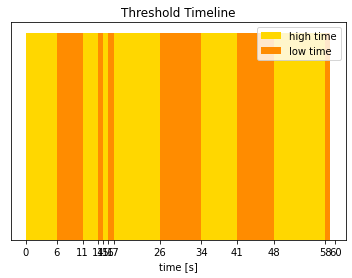

In [57]:
tempTime = highTime + lowTime
endTime = 1 + max(tempTime)

bns = []
i = 0
while i <= endTime:
    bns.append(i)
    i += 1
    
pp.hist(highTime,bins=bns,label="high time", histtype = 'bar', color = "gold")
pp.hist(lowTime,bins=bns,label="low time", histtype = 'bar', color = "darkorange")
pp.legend()
pp.xlabel("time [s]")
pp.yticks([])
pp.xticks(xtic)
pp.title("Threshold Timeline")
pp.show()

In [58]:
pp.close()

def getDiffs(timePairs):
    diffList = []
    for pair in timePairs:
        timeValues = channel1_rising[np.logical_and(channel1_rising > (pair[0]*1e9), channel1_rising < (pair[1]*1e9))]
        theseDiffs = list(timeValues[1:]-timeValues[:-1])
        diffList = diffList + theseDiffs
    return np.array(diffList)

lowDiffs = getDiffs(lowTimeRanges)
highDiffs = getDiffs(highTimeRanges)
allDiffs = np.array(list(lowDiffs) + list(highDiffs))

In [59]:
print(len(lowDiffs))
print()
print(len(highDiffs))

539655

1859556


<ipython-input-60-820038c6f139>:3: RuntimeWarning: invalid value encountered in log10
  ax.hist(np.log10(allDiffs), bins = bns, histtype = 'step', density = True, label = 'All times')
c:\users\hamis\appdata\local\programs\python\python38-32\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\hamis\appdata\local\programs\python\python38-32\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
<ipython-input-60-820038c6f139>:4: RuntimeWarning: invalid value encountered in log10
  ax.hist(np.log10(highDiffs), bins = bns, histtype = 'step', density = True, label = 'High rate')
c:\users\hamis\appdata\local\programs\python\python38-32\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\hamis\appdata\local\programs\python\python3

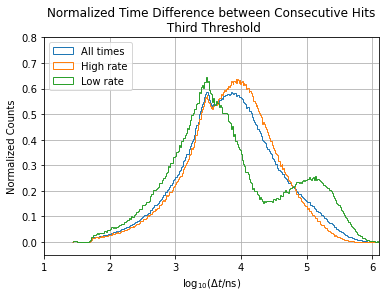

In [60]:
bns = 400
ax = pp.subplot(1,1,1)
ax.hist(np.log10(allDiffs), bins = bns, histtype = 'step', density = True, label = 'All times')
ax.hist(np.log10(highDiffs), bins = bns, histtype = 'step', density = True, label = 'High rate')
ax.hist(np.log10(lowDiffs), bins = bns, histtype = 'step', density = True, label = 'Low rate')
ax.grid()
ax.set_axisbelow(True)
ax.set_xlim(1,6.1)
ax.set_ylim(-0.05,0.8)
ax.legend(loc = 'upper left')
ax.set_ylabel("Normalized Counts")
ax.set_xlabel(r"$\mathrm{log}_{10} \left(\Delta t/\mathrm{ns}\right)$")
ax.set_title("Normalized Time Difference between Consecutive Hits\n Third Threshold")
pp.show()

In [61]:
clearTimeDiff()

Cleared variables from memory



# Highest Threshold

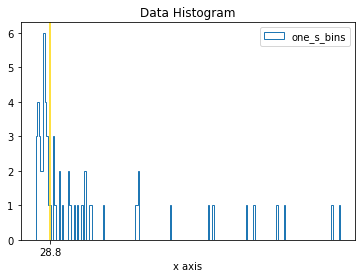

In [62]:
#pp.close()
threshold = 24 + 24*0.2

one_s_bins, *trash = np.histogram(time[np.where(np.logical_and(channel==4,edge==0))],bins=60)

pp.hist(one_s_bins,bins=200,label = "one_s_bins",histtype = 'step')
pp.legend()
pp.xlabel("x axis")
pp.xticks([threshold])
pp.axvline(x=threshold, ymin=0, ymax=6, color = "gold")
pp.title("Data Histogram")
pp.show()

In [63]:
pp.close() ## I Run Into A Memory Error Here ##################################################################################
xtic=[0]   ####################################################################################################################
lowTimeRanges = []
highTimeRanges = []
i = 0
lowTime = []
highTime = []
while i < len(one_s_bins):
    print(i)
    print()
    if one_s_bins[i] < threshold:
        startSecond = i
        while one_s_bins[i] < threshold:
            if i+1 == len(one_s_bins):
                i += 1
                break
            else:
                lowTime.append(i)
                i += 1
        endSecond = i
        lowTimeRanges.append(np.array([startSecond,endSecond]))
        xtic.append(endSecond)
    else:
        startSecond = i
        while one_s_bins[i] >= threshold:
            if i+1 == len(one_s_bins):
                i += 1
                break
            else:
                highTime.append(i)
                i += 1
        endSecond = i
        highTimeRanges.append(np.array([startSecond,endSecond]))
        xtic.append(endSecond)

#lowTime = np.array(lowTime)
#highTime = np.array(highTime)
lowTimeRanges = np.array(lowTimeRanges)
highTimeRanges = np.array(highTimeRanges)

0

4

5

6

11

13

17

23

24

26

34

40

48

58

59



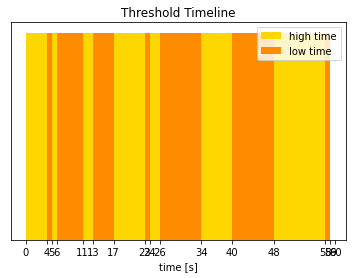

In [64]:
tempTime = highTime + lowTime
endTime = 1 + max(tempTime)

bns = []
i = 0
while i <= endTime:
    bns.append(i)
    i += 1
    
pp.hist(highTime,bins=bns,label="high time", histtype = 'bar', color = "gold")
pp.hist(lowTime,bins=bns,label="low time", histtype = 'bar', color = "darkorange")
pp.legend()
pp.xlabel("time [s]")
pp.yticks([])
pp.xticks(xtic)
pp.title("Threshold Timeline")
pp.show()

In [65]:
print(lowTimeRanges)

[[ 4  5]
 [ 6 11]
 [13 17]
 [23 24]
 [26 34]
 [40 48]
 [58 59]]


In [66]:
print(highTimeRanges)

[[ 0  4]
 [ 5  6]
 [11 13]
 [17 23]
 [24 26]
 [34 40]
 [48 58]
 [59 60]]


In [67]:
pp.close()
def getDiffs(timePairs):
    diffList = []
    for pair in timePairs:
        timeValues = channel1_rising[np.logical_and(channel1_rising > (pair[0]*1e9), channel1_rising < (pair[1]*1e9))]
        theseDiffs = list(timeValues[1:]-timeValues[:-1])
        diffList = diffList + theseDiffs
        
    return np.array(diffList)

lowDiffs = getDiffs(lowTimeRanges)
highDiffs = getDiffs(highTimeRanges)
allDiffs = np.array(list(lowDiffs) + list(highDiffs))

In [68]:
print(len(lowDiffs))
print()
print(len(highDiffs))

608983

1790226


<ipython-input-69-77489f8d3cd8>:3: RuntimeWarning: invalid value encountered in log10
  ax2.hist(np.log10(allDiffs), bins = bns, histtype = 'step', density = True, label = 'All times')
c:\users\hamis\appdata\local\programs\python\python38-32\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\hamis\appdata\local\programs\python\python38-32\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
<ipython-input-69-77489f8d3cd8>:4: RuntimeWarning: invalid value encountered in log10
  ax2.hist(np.log10(highDiffs), bins = bns, histtype = 'step', density = True, label = 'High rate')
c:\users\hamis\appdata\local\programs\python\python38-32\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\hamis\appdata\local\programs\python\pytho

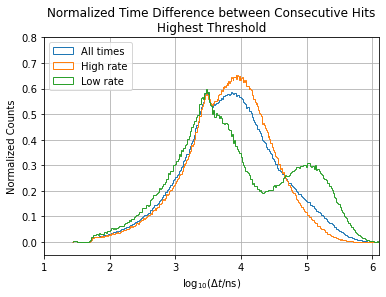

In [69]:
bns = 400
ax2 = pp.subplot(1,1,1)
ax2.hist(np.log10(allDiffs), bins = bns, histtype = 'step', density = True, label = 'All times')
ax2.hist(np.log10(highDiffs), bins = bns, histtype = 'step', density = True, label = 'High rate')
ax2.hist(np.log10(lowDiffs), bins = bns, histtype = 'step', density = True, label = 'Low rate')
ax2.grid()
ax2.set_axisbelow(True)
ax2.set_xlim(1,6.1)
ax2.set_ylim(-0.05,0.8)
ax2.legend(loc = 'upper left')
ax2.set_ylabel("Normalized Counts")
ax2.set_xlabel(r"$\mathrm{log}_{10} \left(\Delta t/\mathrm{ns}\right)$")
ax2.set_title("Normalized Time Difference between Consecutive Hits\nHighest Threshold")
pp.show()

In [70]:
pp.close()
clearTimeDiff()

Cleared variables from memory



Make a histogram to chose a threshold for each threshold!
Maybe baseline +20% or something?



## Look for Coincidences

In [71]:
upData =   np.sort(time[np.where( np.logical_and(channel==1, edge==0))])
downData = np.sort(time[np.where( np.logical_and(channel==5, edge==0))])

In [5]:
len(upData)

2399223

In [6]:
len(downData)

1985677

In [8]:
def coincidences(up, down):
    longDiffs = []
    shortDiffs = []
    sharpDiffs = []
    masterList = []
    
    if len(up) > len(down): # decide which (up or down) is a longer list
        short = down; long = up
    else:
        short = up; long = down
        
    for i in range(len(short)): # parse over the shorter list to save time
        t = short[i]            # value at that index
        tcoin = 25              # coincidence time in 'ns'
        tmin = t-tcoin; tmax = t+tcoin
        potentialList = long[np.where(np.logical_and(long > tmin, long < tmax))]
        
        if len(potentialList) > 0:
            # print("values at ")
            # print(i)
            # print()
            if len(potentialList) > 1:
                # there are multiple values
                continue
            nextEvent = short[ i + 1 ] - t
            if nextEvent > 10**4.2:
                longDiffs.append(t - potentialList[0]) # low noise time?
            else:
                shortDiffs.append(t - potentialList[0]) # high noise time?
            
            if nextEvent > 10**3.4 and nextEvent < 10**3.6:
                sharpDiffs.append(t - potentialList[0])
            
            masterList.append(np.array([t, potentialList[0]]))
        else:     
            #print("no values at ")
            #print(i)
            #print()
            masterList.append(np.array([0,0]))
    
    longDiffs = np.array(longDiffs)
    shortDiffs = np.array(shortDiffs)
    sharpDiffs = np.array(sharpDiffs)
    masterList = np.array(masterList)
    
    return longDiffs, shortDiffs, sharpDiffs, masterList

In [9]:
start = datetime.now()
long, short, sharp, master = coincidences(upData,downData) # search for coincidences
end = datetime.now()
print(end-start)

f= open('long.txt','w+') # save data to coresponding text files
np.savetxt(f, long)
print("\nLong => ")
print(len(long))
f.close
 
f= open('short.txt','w+')
np.savetxt(f, short)
print("\nShort => ")
print(len(short))
f.close

f= open('sharp.txt','w+')
np.savetxt(f, sharp)
print("\nSharp => ")
print(len(sharp))
f.close

f= open('master.txt','w+')
np.savetxt(f, master)
print("\nMaster => ")
print(len(master))
f.close

3:00:35.730639

Long => 
1601

Short => 
1799

Sharp => 
272

Master => 
1985676


<function TextIOWrapper.close()>

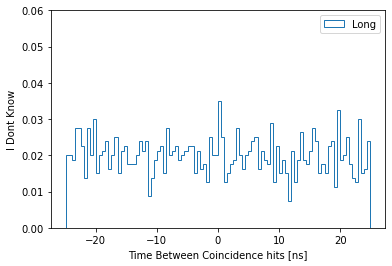

In [18]:
ax3 = pp.subplot(1,1,1)
bns = 100
ax3.hist(long, bins = bns, histtype = 'step', density = True, label = 'Long')
#ax3.hist(short, bins = bns, histtype = 'step', density = True, label = 'Short')
#ax3.hist(sharp, bins = bns, histtype = 'step', density = True, label = 'Sharp')
ax3.set_xlabel("Time Between Coincidence hits [ns]")
ax3.set_ylabel("I Dont Know")
ax3.set_ylim([0, 0.06])
ax3.legend()
pp.show()

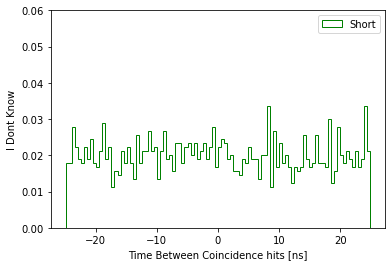

In [19]:
ax3 = pp.subplot(1,1,1)
ax3.hist(short, bins = bns, histtype = 'step', density = True, label = 'Short', color = 'green')
ax3.set_xlabel("Time Between Coincidence hits [ns]")
ax3.set_ylabel("I Dont Know")
ax3.set_ylim([0, 0.06])
ax3.legend()
pp.show()

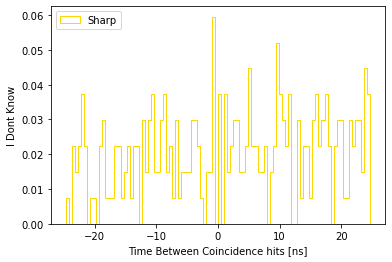

In [15]:
ax3 = pp.subplot(1,1,1)
ax3.hist(sharp, bins = bns, histtype = 'step', density = True, label = 'Sharp', color = 'gold')
ax3.set_xlabel("Time Between Coincidence hits [ns]")
ax3.set_ylabel("I Dont Know")
#ax3.set_ylim([0, 0.036])
ax3.legend(loc="upper left")
pp.show()

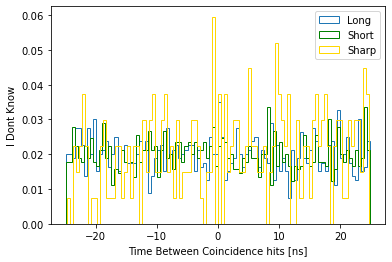

In [17]:
ax3 = pp.subplot(1,1,1)
bns = 100
ax3.hist(long, bins = bns, histtype = 'step', density = True, label = 'Long')
ax3.hist(short, bins = bns, histtype = 'step', density = True, label = 'Short', color = 'green')
ax3.hist(sharp, bins = bns, histtype = 'step', density = True, label = 'Sharp',color = 'gold')
ax3.set_xlabel("Time Between Coincidence hits [ns]")
ax3.set_ylabel("I Dont Know")
#ax3.set_ylim([0, 0.036])
ax3.legend()
pp.show()